In [262]:
%pylab inline
import biff
import coefficients_smoothing
from astropy.coordinates import SkyCoord
from astropy import units as u
from adjustText import adjust_text

Populating the interactive namespace from numpy and matplotlib


In [282]:
font = {'size':20, 'family':'serif'}
matplotlib.rc('font', **font)

In [140]:
G_gadget=43007.1

In [420]:
xlmc_com = -1
ylmc_com = -41
zlmc_com = -28

vxlmc_com = -57
vylmc_com = -226
vzlmc_com = 221

In [421]:
data = genfromtxt('../data/MW_satellites.dat', dtype=None)
vx = data['f7'] - vxlmc_com
vy = data['f9'] - vylmc_com
vz = data['f11'] - vzlmc_com 
x = data['f13'] - xlmc_com
y = data['f15'] - ylmc_com
z = data['f17'] - zlmc_com
name = data['f0']




d = np.sqrt(x**2 + y**2 + z**2)
v = np.sqrt(vx**2 + vy**2 + vz**2)

/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.


In [422]:
S, T = coefficients_smoothing.read_coeff_matrix('../data/LMC/BFE_bound/LMC_1M_bound_2T_V_BFE_coeff_sample_0', 20, 20, 20, 20, 0, 20)
SS, TT, ST = coefficients_smoothing.read_cov_elements('../data/LMC/BFE_bound/LMC_1M_bound_2T_V_BFE_covmat_sample_0', 20, 20, 20, 20, 0, 20)


In [423]:
mass_lmc_1m = 5.585428569999600208e-06
#mass_lmc_1m = 9.8424151727874e-06

In [456]:
y_grid = np.arange(-200, 200, 2.2)
z_grid = np.arange(-200, 200, 2.2)
y_grid, z_grid = meshgrid(y_grid, z_grid)
bins=110

xyz = np.ascontiguousarray(np.array([np.zeros(len(y_grid.flatten())),
                                     y_grid.flatten(), z_grid.flatten()]).T)

In [457]:
S_smooth, T_smooth, N_smooth = coefficients_smoothing.smooth_coeff_matrix(S, T, SS, TT, ST, 
                                                                          mass_lmc_1m, 20, 20, 20, sn=20)
rho_biff = biff.density(np.ascontiguousarray(xyz), S_smooth, T_smooth, M=1, r_s=10)

/home/xzk/work/github/MW-LMC-SCF/code/coefficients_smoothing.py:107: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))


In [458]:
xyz_sats = np.array([x, y, z]).T

In [459]:
pot_sats = biff.potential(np.ascontiguousarray(xyz_sats), S_smooth, T_smooth, M=1, r_s=10, G=G_gadget)

In [460]:
T_sats = v**2/2.

In [461]:
E = 2*T_sats + pot_sats

In [462]:
#(Hor1,Car2, Car3 and Hyi1)

In [463]:
bound_sats2 = argsort(E)
closest_sats2 = argsort(d)

In [464]:
index_bound = np.where(E<0)[0]


In [465]:
name[index_bound]

array([b'Phx2'], dtype='|S7')

In [466]:
dist_cut = np.where(d<100)[0]

In [467]:
name[bound_sats]

array([b'Phx2', b'Hyd1', b'Hor1', b'Ret2', b'Car3', b'Boo3', b'Hyd2',
       b'Car1', b'Car2', b'Fnx1', b'Leo1', b'Tuc2', b'Boo1', b'Seg1',
       b'UMaj2', b'CanVen2', b'Wil1', b'Her1', b'Leo2', b'Seg2', b'Phx1',
       b'Sag1', b'UMaj1', b'Gru1', b'Tri2', b'CanVen1', b'Boo2', b'Sext1',
       b'Leo5', b'ComBer1', b'Cra2', b'Leo4', b'Dra1', b'UMin1', b'Pis2',
       b'Aqu2', b'Scu1', b'Tuc3', b'Dra2', b'Eri2'], dtype='|S7')

In [468]:
name[bound_sats2]

array([b'Phx2', b'Hyd1', b'Hor1', b'Ret2', b'Car3', b'Boo3', b'Hyd2',
       b'Car1', b'Car2', b'Fnx1', b'Leo1', b'Tuc2', b'Boo1', b'Seg1',
       b'UMaj2', b'CanVen2', b'Wil1', b'Her1', b'Leo2', b'Seg2', b'Phx1',
       b'Sag1', b'UMaj1', b'Gru1', b'Tri2', b'CanVen1', b'Boo2', b'Sext1',
       b'Leo5', b'ComBer1', b'Cra2', b'Leo4', b'Dra1', b'UMin1', b'Pis2',
       b'Aqu2', b'Scu1', b'Tuc3', b'Dra2', b'Eri2'], dtype='|S7')

In [469]:
colors = (E[dist_cut]-np.min(E[dist_cut])+1)

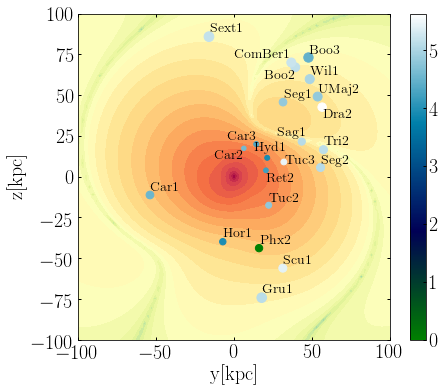

In [476]:
figure(figsize=(7,6))
contourf(y_grid, z_grid, np.log10(np.abs(rho_biff.reshape((182, 182)))).T, 40, cmap='Spectral_r', origin='lower')
im = scatter(y[dist_cut], z[dist_cut], s=d[dist_cut], c=np.log10(colors), cmap='ocean')
xlim(-100, 100)
ylim(-100, 100)
texts = [plt.text(y[dist_cut][i], z[dist_cut][i], 
                  (name.astype(str)[dist_cut][i]), fontsize=14) for i in range(len(x[dist_cut]))]
adjust_text(texts)
cbar = colorbar(im)
xlabel('y[kpc]')
ylabel('z[kpc]')
savefig('LMC bound_satellites.png', bbox_inches='tight')

In [479]:
savetxt('rho_bfe_lmc5_bound_2T_V_s182x182_sn20.txt', rho_biff)

In [505]:
name.astype(str)

array(['Car1', 'Dra1', 'Fnx1', 'Leo1', 'Leo2', 'Sag1', 'Scu1', 'Sext1',
       'UMin1', 'Aqu2', 'Boo1', 'Boo2', 'Boo3', 'CanVen1', 'CanVen2',
       'Car2', 'Car3', 'ComBer1', 'Cra2', 'Dra2', 'Eri2', 'Gru1', 'Her1',
       'Hor1', 'Hyd1', 'Hyd2', 'Leo4', 'Leo5', 'Phx1', 'Phx2', 'Pis2',
       'Ret2', 'Seg1', 'Seg2', 'Tri2', 'Tuc2', 'Tuc3', 'UMaj1', 'UMaj2',
       'Wil1'], dtype='<U7')

In [515]:
savetxt('Energy_from_LMC_all_dwarfs.txt', np.array([name.astype(str), E]).T, delimiter='  ', fmt="%s")

In [519]:
!head -40 Energy_from_LMC_all_dwarfs.txt

Car1  32359.92760279897
Dra1  202484.60776160113
Fnx1  41801.71887987001
Leo1  53076.65101755078
Leo2  117366.44322011707
Sag1  122351.41088973524
Scu1  263600.9501808844
Sext1  145230.21699400517
UMin1  211610.9153403723
Aqu2  255364.8320137006
Boo1  63251.87387368528
Boo2  139129.48921855108
Boo3  27388.18045089222
CanVen1  135170.1965312762
CanVen2  87228.22833582843
Car2  36800.83595871963
Car3  17132.566908837012
ComBer1  162269.48844977602
Cra2  162851.26722304843
Dra2  425431.49779955763
Eri2  736685.1885565078
Gru1  126709.50064302048
Her1  101444.45341962451
Hor1  5575.605807693371
Hyd1  5494.348287865163
Hyd2  28091.248954080187
Leo4  166650.32355684967
Leo5  149842.76821601362
Phx1  121324.30321423589
Phx2  -3144.1161219874452
Pis2  213919.2044050376
Ret2  13199.015181532348
Seg1  63926.30249470031
Seg2  119496.95600416516
Tri2  133586.0366582868
Tuc2  62219.01403279989
Tuc3  287467.0427170649
UMaj1  122834.69798698886
UMaj2  65036.71566159582
Wil1  100065.32603631899


In [ ]:
savetxt(rho_biff)

In [72]:
bbins = 180
lbins = 360

d_b_rads = np.linspace(-np.pi/2., np.pi/2., bbins)
d_l_rads = np.linspace(-np.pi, np.pi, lbins)
l_grid, b_grid = np.meshgrid(d_l_rads, d_b_rads)
dist = 50 


c = SkyCoord(l=l_grid*u.radian, b=b_grid*u.radian, distance = dist*u.kpc, frame='galactic')


In [96]:
x_grid, y_grid, z_grid = c.cartesian.x, c.cartesian.y, c.cartesian.z